In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [8]:
results = pd.read_csv('../Data/ResultData/bolt_results.csv')

In [9]:
results.head()

,symbol,indicator,start_date,end_date,pattern_buy_repr,pattern_sell_repr,pattern_buy_size,pattern_sell_size,mean,std,skewness,kurtosis,entropy,n_total_partitions,n_partitions,clean_gains
0,ADA/USDT,bolt,2020-09-12 00:01:00,2020-09-12 23:59:00,2,2,2,2,0.096585,0.000838,-0.070566,-0.741824,7.271666,10,10,0.000000
1,ADA/USDT,bolt,2020-09-12 00:01:00,2020-09-12 23:59:00,2,3,2,2,0.096585,0.000838,-0.070566,-0.741824,7.271666,10,4,0.034424
2,ADA/USDT,bolt,2020-09-12 00:01:00,2020-09-12 23:59:00,2,2,2,3,0.096585,0.000838,-0.070566,-0.741824,7.271666,10,10,0.000000
3,ADA/USDT,bolt,2020-09-12 00:01:00,2020-09-12 23:59:00,2,3,2,3,0.096585,0.000838,-0.070566,-0.741824,7.271666,10,6,0.074113
4,ADA/USDT,bolt,2020-09-12 00:01:00,2020-09-12 23:59:00,2,4,2,3,0.096585,0.000838,-0.070566,-0.741824,7.271666,10,4,-0.139439


In [10]:
results.shape[0]

18928

array([[<AxesSubplot:title={'center':'clean_gains'}>]], dtype=object)

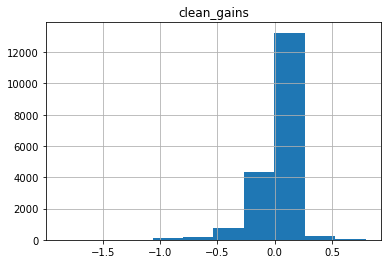

In [11]:
results.hist(column=['clean_gains'])

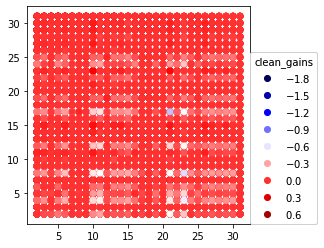

In [12]:
fig, ax = plt.subplots()
scatter = ax.scatter(results['pattern_buy_repr'], results['pattern_sell_repr'], c=results['clean_gains'], cmap="seismic")
legend = ax.legend(*scatter.legend_elements(), loc = (1, 0), title="clean_gains")
ax.add_artist(legend)
plt.gcf().set_size_inches((4, 4))
plt.show()

In [13]:
le = preprocessing.LabelEncoder()
pattern_buy_repr = le.fit_transform(results['pattern_buy_repr'])
pattern_sell_repr = le.fit_transform(results['pattern_sell_repr'])
pattern_buy_size = le.fit_transform(results['pattern_buy_size'])
pattern_sell_size = le.fit_transform(results['pattern_sell_size'])

In [14]:
#aux = results.drop(columns=['symbol', 'start_date', 'end_date'])
aux = results.drop(columns=['symbol', 'indicator', 'start_date', 'end_date', 'pattern_buy_repr', 'pattern_sell_repr', 'pattern_buy_size', 'pattern_sell_size'])
aux = aux.values

In [15]:
x_train = []
for i in range(len(aux)):
    x_train.append(np.append(aux[i], [pattern_buy_repr[i], pattern_sell_repr[i], pattern_buy_size[i], pattern_sell_size[i]]))

In [16]:
kmeans = KMeans(n_clusters=30, random_state=0).fit(x_train)

In [17]:
for i in kmeans.cluster_centers_:
    print(i[7])

-0.038038053689775746
-0.025289847703668464
-0.01839875529493131
-0.005435917000640153
-0.019740355297314747
-0.007311566356008162
-0.024743323591000416
0.002477687670088026
0.053422748306900567
0.019266421913582275
-0.030367746313663395
-0.060694337313000626
-0.024287718505706265
-0.0009139695244743881
0.007104293664016412
0.025139143979864807
-0.020866622157527354
0.0037036527792586975
0.004018779620314338
-0.021340715732944562
0.01667459805182824
-0.05050842263853769
-0.05513848493612973
-0.036445410169744036
0.023254653910270515
-0.052721140239303216
-0.0761039770224454
-0.04904916558639993
-0.02541135731518728
0.013848859857780695
